Импортируем все необходимые модули, в том числе mirror

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import mirror

In [2]:
n = 10
m = 100

Создаём объект DataGenerator для генерации данных. Параметр sparse задаёт, будут матрица А и вектор с разреженными или нет. Если да, то параметр density задаёт степень разреженности.

In [3]:
g = mirror.DataGenerator(n, m, sparse=False)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()

Создаём объект Mirror, указывая ему все параметры задачи.

In [4]:
mr = mirror.Mirror(c=c, A=A, b=b)

Внутри этого объекта имеется доступ ко всем параметрам задачи

In [5]:
print 'First 5 components of vector c: ' + str(mr.c[:10]) + '\n'
print 'First 5 components of vector b: ' + str(mr.b[:10]) + '\n'
print 'Mg = ' + str(mr.Mg) + '\n'
print 'Mf = ' + str(mr.Mf)

First 5 components of vector c: [ 0.30862676  0.05190558  0.49315685  0.44123928  0.78920947  0.53719634
  0.78631933  0.40802841  0.32405996  0.27892841]

First 5 components of vector b: [-0.28735706  1.45114465 -1.61408189  0.91144865 -0.27329403 -3.71442199
  4.84278429 -4.5666791   0.85793679  2.91460942]

Mg = 2.48046019391

Mf = 1.55398620703


Метод solve класса Mirror решает задачу. В качестве первого параметра необходимо задать точность, с которой будут приближаться ограничения.

Метод solve можно запускать в двух видах. Первый -- это с фиксированным числом итераций. Для того, чтобы пойти по этому пути, нужно задать число итераций N_iter. Если число итераций не задано, то метод будет работать по второму пути: с критерием останова в виде двойственного зазора.

Список параметров метода solve:

eps -- точность удовлетворения ограничениям

N_iter -- число итераций

stochastic -- True или False в зависимости от того, хотим стохастический метод или детерминированный

check_every -- через каждые сколько итераций проверять значение зазора двойственности (если N_iter=None)

max_iter -- максимальное число итераций (если N_iter=None)

trace -- возвращать ли прогресс метода в течение итераций

In [6]:
xN, lam, tr = mr.solve(eps=0.1, N_iter=100, trace=True)

Algorithm has not converged


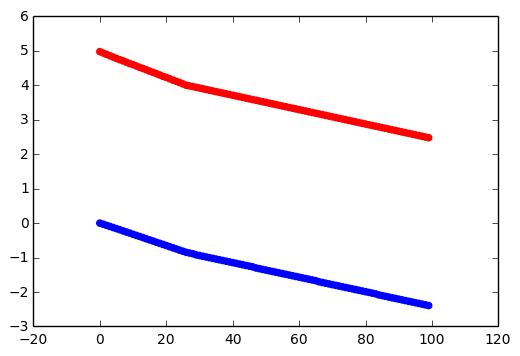

In [7]:
plt.scatter(range(100), tr['objective'], color='blue')
plt.scatter(range(100), tr['constraints'], color='red')
plt.show()

Теперь попробуем стохастический вариант метода, для этого данные лучше должны быть разреженными

In [8]:
g = mirror.DataGenerator(n, m, sparse=True, density=0.1)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()

mr = mirror.Mirror(c=c, A=A, b=b)

In [11]:
xN, lam, tr = mr.solve(eps=0.1, N_iter=1000, stochastic=True, trace=True)

Algorithm has not converged


Видим, что в стохастическом случае ограничения медленно-медленно начали спускаться

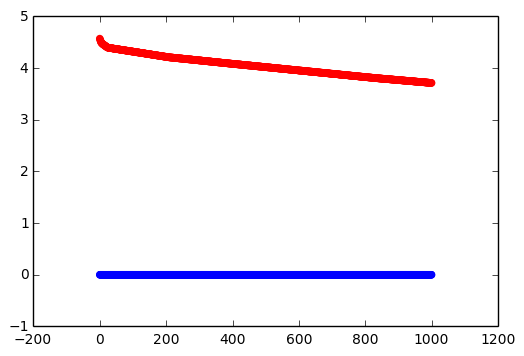

In [12]:
plt.scatter(range(1000), tr['objective'], color='blue')
plt.scatter(range(1000), tr['constraints'], color='red')
plt.show()

Теперь попробуем метод без фиксированного числа итераций (тут всё пока что плохо), для начала не в стохастическом случае (и в плотном, чтобы нагляднее)

In [16]:
g = mirror.DataGenerator(n, m, sparse=False)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()

mr = mirror.Mirror(c=c, A=A, b=b)

In [17]:
xN, lam, tr = mr.solve(eps=0.1, stochastic=False, max_iter=100000, check_every=10000, trace=True)

Maximum number of iterations reached


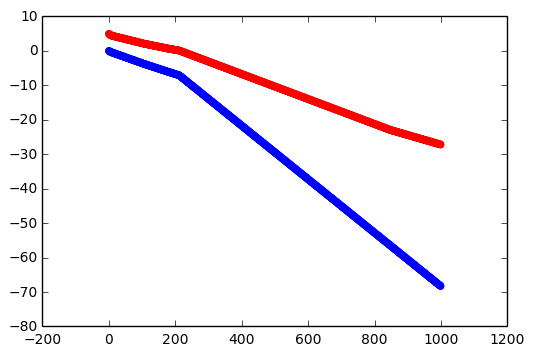

In [18]:
plt.scatter(range(1000), tr['objective'][:1000], color='blue')
plt.scatter(range(1000), tr['constraints'][:1000], color='red')
plt.show()

Видно, что целевая функция и ограничения уменьшаются, но почему зазор двойственности увеличивается?

In [23]:
tr['gap']

[387.6624680146025,
 776.39986979620664,
 1165.1627465688439,
 1553.9318902866912,
 1942.7035247716649,
 2331.4764002241845,
 2720.2499831853374,
 3109.0240076344571,
 3497.798326061421]

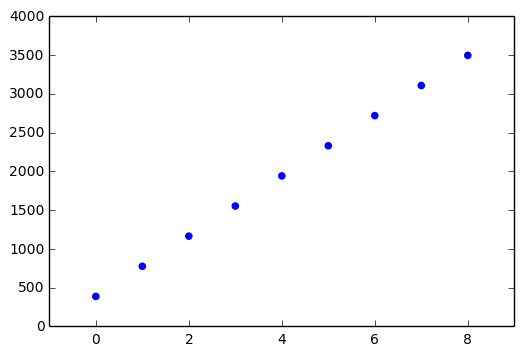

In [24]:
plt.scatter(range(9), tr['gap'], color='blue')
plt.show()